# UMAP Performance on Word Vectors

We look at the speed performance of UMAP when increasing data set size and dimensionality.

This notebook was run on a MacBook Pro 2015 (2.2 GHz Intel Core i7, 16 GB 1600 MHz DDR3) during normal operation (web browsing, streaming, scripting).  

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import gensim
import umap
import time

print("gensim: %s"%gensim.__version__)
print("numpy: %s"%np.__version__)
print("scipy: %s"%scipy.__version__)
print("umap: 0.2.1")

gensim: 1.0.0rc1
numpy: 1.12.1
scipy: 0.19.1
umap: 0.2.1


## Creating dataset

We use the same data source from the [paper](https://arxiv.org/abs/1802.03426): `GoogleNews-vectors-negative300.bin` ([download](https://github.com/mmihaltz/word2vec-GoogleNews-vectors)). This is a pretrained word vector model containing 3 million tokens (including n-grams), trained on GoogleNews articles.

We use the [GenSim](https://github.com/RaRe-Technologies/gensim) library to generate the 300-dimensional word vectors for the 250.000 most popular tokens.

### Load word2vec file

In [3]:
LOCATION_W2V = "GoogleNews-vectors-negative300.bin"
wv = gensim.models.keyedvectors.KeyedVectors.load_word2vec_format(LOCATION_W2V, binary=True)
wv.init_sims(replace=True)

### Sort vocabulary by index/count

In [4]:
VOCABULARY = [w[1] for w in sorted([(wv.vocab[w].index,w) for w in wv.vocab.keys()])]

### Get first 250.000 word vectors in a NumPy array

In [64]:
X = np.array([wv[word] for word in VOCABULARY[:250000]])
print(X.shape)

(250000, 300)


## Performance tests

### Increasing data set size

We increase the data set size by 10.000 every step (up to 250.000 samples), and measure the amount of seconds it takes to `fit_transform` the data.

As we are embedding word vectors we use the relevant `cosine`-metric for this. Note that the choice of metric can have an impact on speed (For instance: the `correlation`-metric can be slower).

10000 19.9989800453
20000 24.9139549732
30000 34.8257169724
40000 47.7085659504
50000 61.0709850788
60000 75.4647960663
70000 90.3703968525
80000 103.945295095
90000 120.492517948
100000 137.702548027
110000 153.680271864
120000 171.988488197
130000 189.115272045
140000 208.655102015
150000 225.587257862
160000 244.883980989
170000 264.936897993
180000 285.632175922
190000 305.372936964
200000 326.969732046
210000 347.639713049
220000 385.875736952
230000 437.442322969
240000 414.380117893
250000 439.652709961


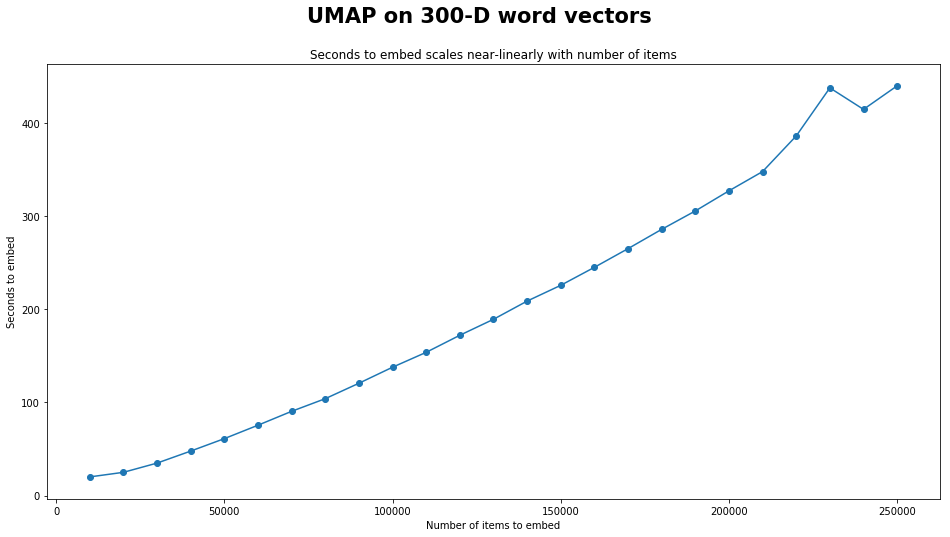

In [65]:
cut_offs = [i * 10000 for i in range(1,26)]

projector = umap.UMAP(random_state=1, metric="cosine")

x = []
y = []
for cut_off in cut_offs:
    start = time.time()
    X_projected = projector.fit_transform(X[:cut_off])
    y.append(time.time()-start)
    x.append(cut_off)
    print(x[-1], y[-1])
    
plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.scatter(x, y)
plt.title("Seconds to embed scales near-linearly with number of items")
plt.suptitle("UMAP on 300-D word vectors", fontweight="bold", fontsize=21)
plt.ylabel("Seconds to embed")
plt.xlabel("Number of items to embed")
plt.show()

### Increasing dimensionality

We plot the results of increasing the dimensionality of a dataset of 100.000 samples. We increase the dimensionality with 10 features every step (up to a dimensionality of 300).

(10, 103.9920380115509)
(20, 129.75078797340393)
(30, 120.59035611152649)
(40, 131.98748683929443)
(50, 125.6469509601593)
(60, 138.01545596122742)
(70, 143.95873284339905)
(80, 129.1990189552307)
(90, 137.04822492599487)
(100, 151.98419785499573)
(110, 128.66085195541382)
(120, 132.1637179851532)
(130, 139.07068705558777)
(140, 140.8279287815094)
(150, 143.89525318145752)
(160, 137.6293821334839)
(170, 136.36746096611023)
(180, 145.17776107788086)
(190, 134.7522428035736)
(200, 131.71079397201538)
(210, 133.92221403121948)
(220, 145.7943160533905)
(230, 150.2304401397705)
(240, 155.6050009727478)
(250, 146.98436999320984)
(260, 142.0018138885498)
(270, 140.8909420967102)
(280, 148.6774468421936)
(290, 143.4051640033722)
(300, 157.74401712417603)


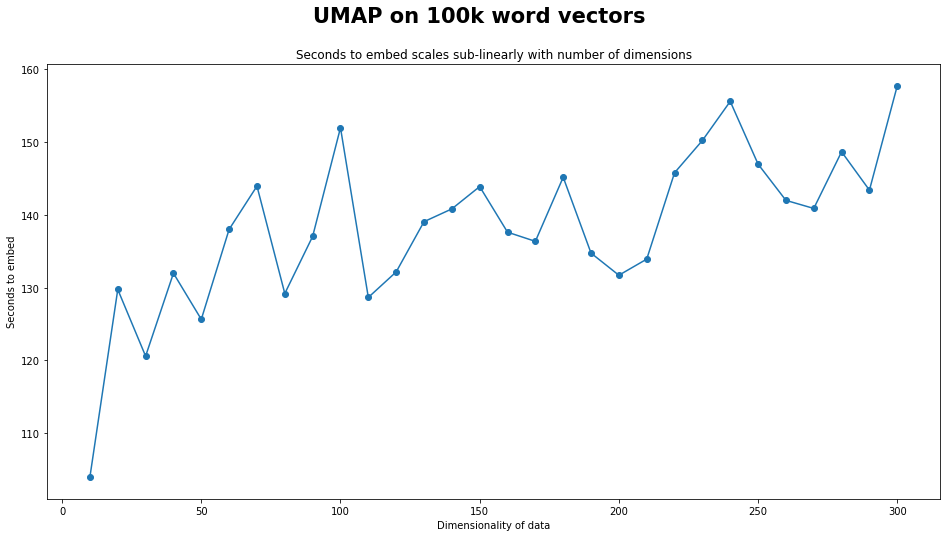

In [90]:
cut_offs = [i * 10 for i in range(1,31)]

projector = umap.UMAP(random_state=1, metric="cosine")

x = []
y = []
for cut_off in cut_offs:
    start = time.time()
    X_projected = projector.fit_transform(X[:100000,:cut_off])
    y.append(time.time()-start)
    x.append(cut_off)
    print(x[-1], y[-1])

plt.figure(figsize=(16,8))
plt.plot(x, y)
plt.scatter(x, y)
plt.title("Seconds to embed scales sub-linearly with number of dimensions")
plt.suptitle("UMAP on 100k word vectors", fontweight="bold", fontsize=21)
plt.ylabel("Seconds to embed")
plt.xlabel("Dimensionality of data")
plt.show()